<a href="https://colab.research.google.com/github/Mwikali-5/Churn/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Classification Project:**

**The project should have the following:**

**1. Model features and preprocessing approaches**
**2. Different kinds of models (logistic regression, k-nearest neighbors, decision trees, etc.)**
**3. Different model hyperparameters**


**At minimum three models must be built:**
**1. Simple baseline model, in this case I will choose logistic regression**
**2. A complex model....random forest and XGBoost**
**3. Different model hyperparameters, so this means a grid search**

# **Phase 3 Supervised Learning Project**

# **Assessment Question**

SyriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn, discontinue their service.

This analysis will determine what features will indicate if a customer will ("soon") discontinue their service..

# **Implementation**

# 1. Defining the Question

# a) Specifying the Question

Build a classifier model to predict the condition of the water pumps.

# b)Defining the Metric for Success

To predict whether or not the water pumps are functional, need repairs or do not worl at all with an accuracy of at least 75%

# c) Understanding the context

The dataset gives information about water pumps that are used to provide water to the citizens of Tanzania. The government want to know which pumps are not doing well so that they can build well that are fully functional. 
The aim is to predict the operating condition of a waterpoint for each record in the dataset.

# d) Recording the Experimental Design

1. Importing the libraries
2. Reading the data
3. Data Wrangling
4. Exploratory data analysis
5. Data preprocessing
6. Supervised Learning
7. Conclusions

# e) Data Description

1. state: the state the customer lives in
2. account length: the number of days the customer has had an account
3. area code: the area code of the customer
4. phone number: the phone number of the customer
5. international plan: true if the customer has the international plan, otherwise false
6. voice mail plan: true if the customer has the voice mail plan, otherwise false
7. number vmail messages: the number of voicemails the customer has sent
8. total day minutes: total number of minutes the customer has been in calls during the day
9. total day calls: total number of calls the user has done during the day
10. total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
11. total eve minutes: total number of minutes the customer has been in calls during the evening
12. total eve calls: total number of calls the customer has done during the evening
13. total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
14. total night minutes: total number of minutes the customer has been in calls during the night
15. total night calls: total number of calls the customer has done during the night
16. total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
17. total intl minutes: total number of minutes the user has been in international calls
18. total intl calls: total number of international calls the customer has done
19. total intl charge: total amount of money the customer was charged by the Telecom company for international calls
20. customer service calls: number of calls the customer has made to customer service
21. churn: true if the customer terminated their contract, otherwise false

# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.figsize":(8, 6)})

# **Reading Data**

In [4]:
#Loading the data

data = pd.read_csv("/content/bigml_59c28831336c6604c800002a.csv")

# **Data Exploration**

In [5]:
#Preview of the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#Preview of the tail of the dataset
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
# Checking number of rows and columns
data.shape

(3333, 21)

In [8]:
# Checking columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# **Data Wrangling**

In [9]:
#Checking for anomalies
#iterating through all columns for unique values in the dataset

for i in data.columns:
  #to print a line in between columns
  print('\n')
  print(data[i].unique())



['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200  

In [10]:
#Checking the datatypes

data.dtypes


state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [11]:
#Checking for null values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [12]:
#Checking duplicates
data.duplicated().sum()

0

In [13]:
#Replacing whitespace with '_' to enable uniformity and to eliminate key errors
data.columns = data.columns.str.replace(' ', '_')


# **Exploratory Data Analysis**

# **a) Univariate**

In [14]:
#Statistical summary of the dataset
#for numeric data
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [15]:
#Statistical summary of the dataset
#for categorical data
data.describe(include = ['object'])

,state,phone_number,international_plan,voice_mail_plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


Looking at the categorical dataset, phone number is really not necessary as it does not add any value to the analysis and will be dropped.

In [17]:
data.drop(['phone_number'], axis = 1, inplace = True)
#confirming if it has been dropped
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# **Area Code**

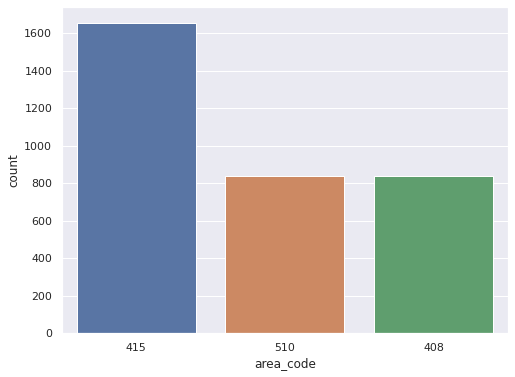

In [27]:
# Histogram showing the distribution of area code
sns.countplot(data=data,x='area_code', order = data.area_code.value_counts().index)

415 is the common area code thus most customers are from this area code.

# **State**

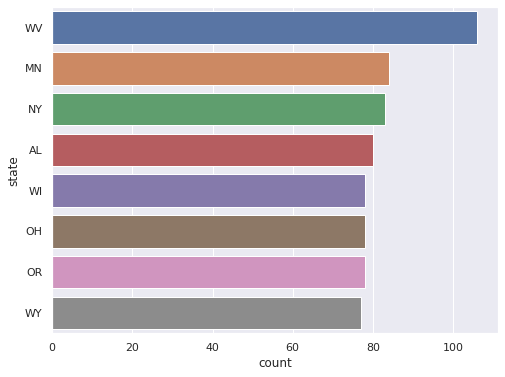

In [18]:
sns.countplot(data=data,y='state', order = data.state.value_counts().iloc[:8].index)

These are the most popular states where the customers from the dataset reside.

# **Voice Mail Plan**

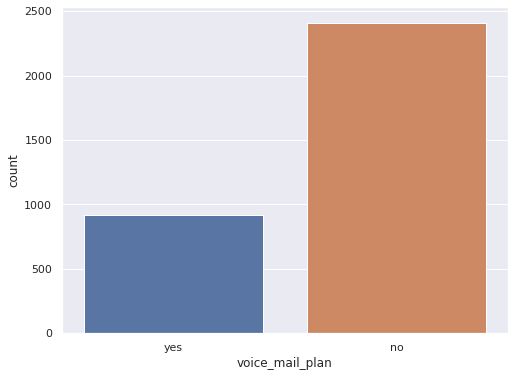

In [19]:
sns.countplot(data=data,x='voice_mail_plan')

Most customers do not have a voice mail plan.

# **Total Day Calls**

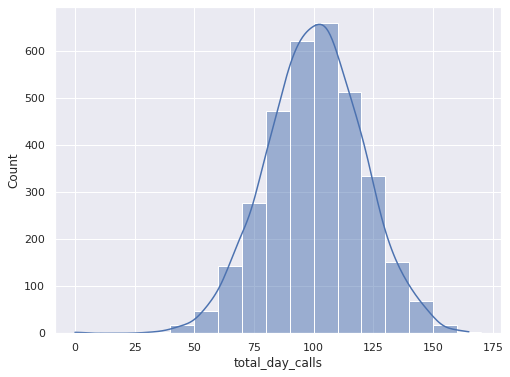

In [40]:
#Histplot showing the distribution of day calls
sns.histplot(data=data,x='total_day_calls', binwidth=10, kde=True)

Majority of people make 100 to 110 calls during the day.


# **Total Evening Calls**

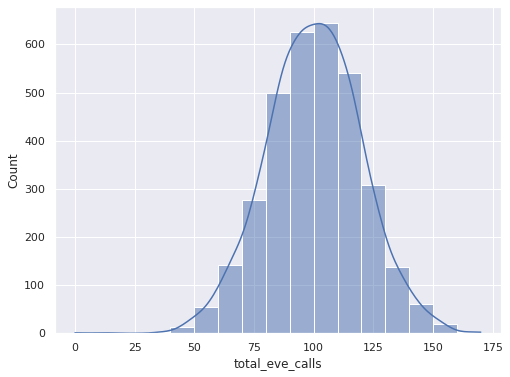

In [41]:
#Histplot showing the distribution of evening calls
sns.histplot(data=data,x='total_eve_calls', binwidth = 10, kde=True)

Majority of people make 100 to 110 calls in the evening, which is almost the same as with day time people.

# **Customer Service Calls**

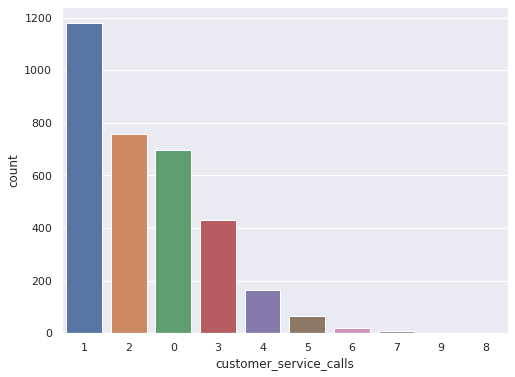

In [36]:
#countplot for customer service calls
sns.countplot(data=data,x='customer_service_calls', order = data.customer_service_calls.value_counts().index)

The number of calls keeps reducing this may mean that the customer was not pleased with the service and discontinued or churned. We will explore this more in bivariate analysis.

# **Churn**

False    2850
True      483
Name: churn, dtype: int64


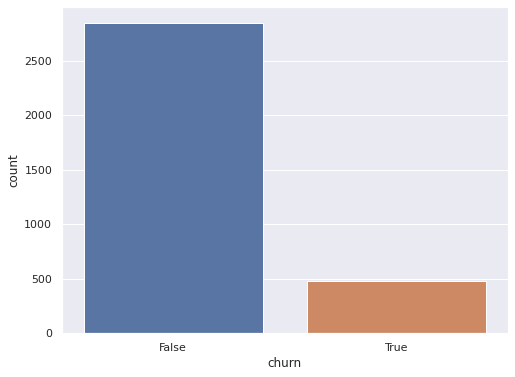

In [39]:
#countplot for churn
sns.countplot(data=data, x ='churn')
print(data['churn'].value_counts())

Most of the customers have not churned or discontinued their service with syria tel. Only 483 have churned.

Note: Their is a class imbalance and we will address it later.

# **International Plan**

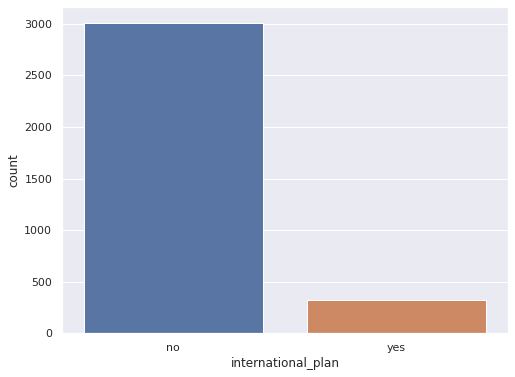

In [43]:
sns.countplot(data=data,x='international_plan')

Majority of the customers do not have an international plan.

# **Account Length**

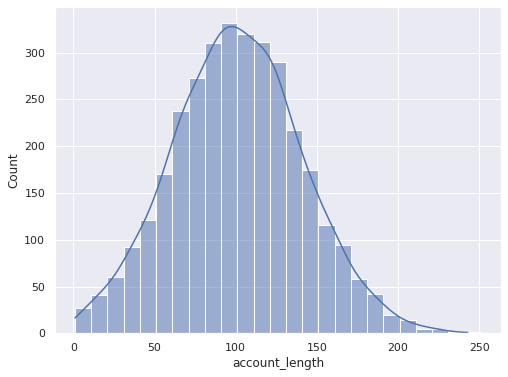

In [45]:
sns.histplot(data=data,x='account_length', binwidth=10, kde=True)

Majority of the customers have had an account for 90 to 100 days

# **b) Bivariate**

In [46]:
# Checking the correlation between numerical variables

correlations = data.corr()
correlations
     

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number_vmail_messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total_night_minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


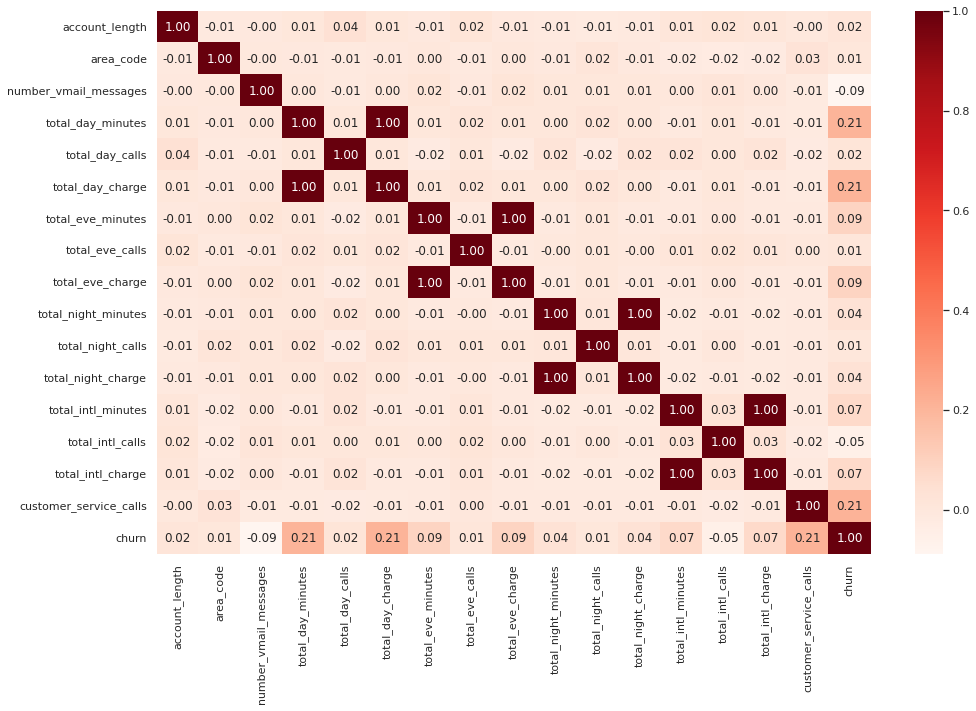

In [48]:
# Creating a correlation heat map for the columns
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()